# Sectors vs Factors
Table fo contents
- [Data](#id)
- [Whole period analysis](#wop)
- [1 year before the start of the COVID-19 pandemic](#1y)
- [From the start of the COVID-19 pandemic to Start of the war in Ukraine](#covid)
- [From the war in Ukraine to today](#war)



<a id="id"></a>
## Data
- Import S&P 500 sectors  index form Yfinance
    - "^SP500-25": "Consumer Discretionary",
    - "^SP500-30": "Consumer Staples", 
    - "^GSPE": "Energy",
    - "^SP500-40": "Financials",
    - "^SP500-35": "Health Care",
    - "^SP500-20": "Industrials",
    - "^SP500-45": "Information Technology",
    - "^SP500-15": "Materials",
    - "^SP500-60": "Real Estate",
    - "^SP500-55": "Utilities"
- Import Ishares factors ETF data from Yfinance
    - "VLUE": "Value",
    - "QUAL": "Quality",
    - "SIZE": "Size",
    - "MTUM": "Momentuim"
    
- Data wrangling
- Creation of a general function <code>cluster_analysis(from_date, to_date, element)</code> with parameters:
    - <code>from_date</code> and <code>to_date</code> in format <code>"yyyy-mm-dd"</code> and values from <code>"2019-01-30"</code> to <code>date.today()</code>
    - <code>date.today()</code>: <code>sectors_returns</code> for sectors analysis and <code>factors_returns</code> for factors analysis

In [105]:
import yfinance as yf
from datetime import date
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_date = "2019-01-30"
end_date = date.today()

us_sectors_data = pd.DataFrame(
    yf.download(
        tickers = "^GSPC ^SP500-50 ^SP500-25 ^SP500-30 ^GSPE ^SP500-40 ^SP500-35 ^SP500-20 ^SP500-45 ^SP500-15 ^SP500-60 ^SP500-55",
        start = start_date, end = end_date,
        interval = "1d"
    )
)["Close"]

us_sectors_data.rename({"^SP500-50" : "Communication Services",
    "^SP500-25": "Consumer Discretionary",
    "^SP500-30": "Consumer Staples", 
    "^GSPE": "Energy",
    "^SP500-40": "Financials",
    "^SP500-35": "Health Care",
    "^SP500-20": "Industrials",
    "^SP500-45": "Information Technology",
    "^SP500-15": "Materials",
    "^SP500-60": "Real Estate",
    "^SP500-55": "Utilities",
    "^GSPC": "S&P 500"
    }, axis=1, inplace=True
)
us_sectors_returns = pd.DataFrame(np.log(us_sectors_data/us_sectors_data.shift(1)))

us_factors_data = pd.DataFrame(
    yf.download(
        tickers = "VLUE QUAL  MTUM SIZE ^GSPC",
        start = start_date, end = end_date,
        interval = "1d"
    )
)["Close"]

us_factors_data.rename({
    "VLUE": "Value",
    "QUAL": "Quality",
    "SIZE": "Size",
    "MTUM": "Momentuim",
    "^GSPC": "S&P 500"

    }, axis=1, inplace=True
)
us_factors_returns = pd.DataFrame(np.log(us_factors_data/us_factors_data.shift(1)))


eu_sectors_data = pd.DataFrame(
    yf.download(
        tickers = "ESIC.DE ESIS.F ESIE.DE ESIF.DE ESIH.DE ESIN.DE ESIT.DE EXV8.DE EXH9.DE EXSA.DE",
        start = start_date, end = end_date,
        interval = "1d"
    )
)["Close"]

eu_sectors_data.rename({
    "EXV2.DE" : "Communication Services",
    "ESIC.DE": "Consumer Discretionary",
    "ESIS.F": "Consumer Staples", 
    "ESIE.DE": "Energy",
    "ESIF.DE": "Financials",
    "ESIH.DE": "Health Care",
    "ESIN.DE": "Industrials",
    "ESIT.DE": "Information Technology",
    "EXV8.DE": "Materials",
    "EXH9.DE": "Utilities",
    "EXSA.DE": "STOXX Europe 600"
    }, axis=1, inplace=True
)

eu_sectors_returns = pd.DataFrame(np.log(eu_sectors_data/eu_sectors_data.shift(1)))


[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  10 of 10 completed


In [108]:
def cluster_analysis(returns, s_date, e_date):
    if s_date is None: 
        s_date = start_date
    
    if e_date is None: 
        e_date = end_date

    returns_period = returns.loc[s_date:e_date]
    corr_period = returns_period.corr()

    if returns is us_sectors_returns:
        sns.clustermap(
            corr_period, 
            cmap="YlGnBu", 
            annot=True, 
            figsize=(7.5, 7.5),  
            vmin=min(us_factors_returns.corr().min().min(), us_sectors_returns.corr().min().min()), 
            vmax=1
        ).fig.suptitle('US Sectors from ' + str(s_date) + ' to ' + str(e_date), y=1.05)

    elif returns is eu_sectors_returns:
        sns.clustermap(
            corr_period, cmap="YlGnBu", 
            annot=True, figsize=(7.5, 7.5),  
            vmin=min(us_factors_returns.corr().min().min(), us_sectors_returns.corr().min().min()), 
            vmax=1
        ).fig.suptitle('EU Sectors from ' + str(s_date) + ' to ' + str(e_date), y=1.05)

    elif returns is us_factors_returns:
        sns.clustermap(
            corr_period, 
            cmap="YlGnBu", 
            annot=True, 
            figsize=(4, 4), 
            vmin=min(us_factors_returns.corr().min().min(), us_sectors_returns.corr().min().min()), 
            vmax=1
        ).fig.suptitle('US Factors from ' + str(s_date) + ' to ' + str(e_date), y=1.05)

    else: print("return definition error")

<a id="wop"></a>
## Whole period analysis

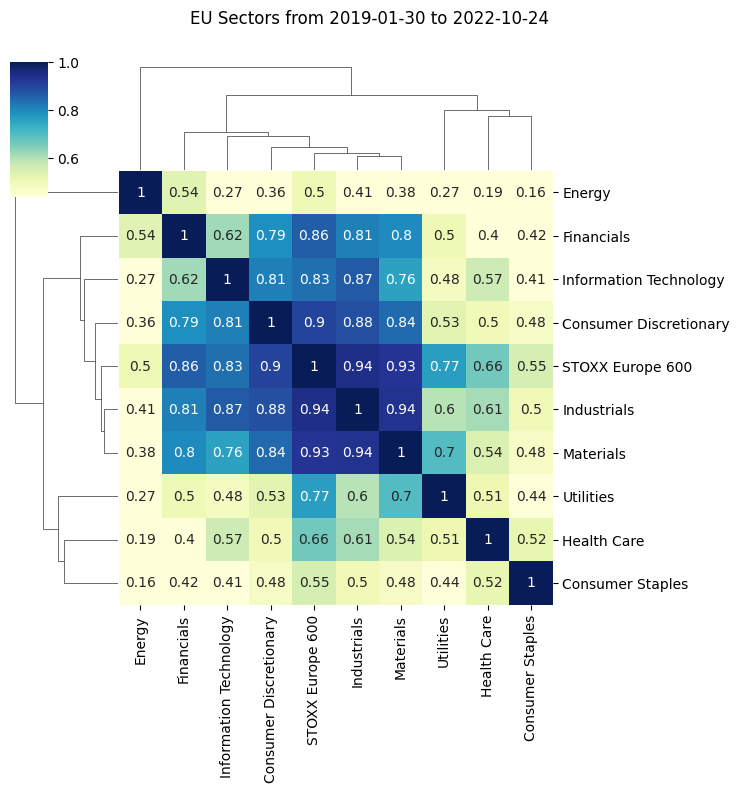

In [109]:
cluster_analysis(eu_sectors_returns, None, None)

AttributeError: 'ClusterGrid' object has no attribute 'axes'

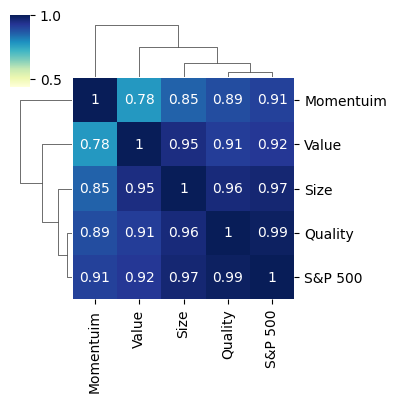

In [55]:
cluster_analysis(us_factors_returns, None, None)

<a id="1y"></a>

## 1 year before the start of the COVID-19 pandemic

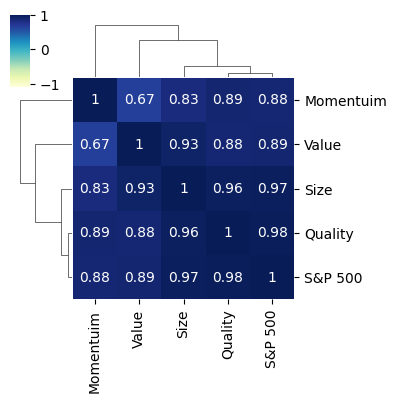

In [38]:
cluster_analysis(us_factors_returns, None, '2020-01-29')

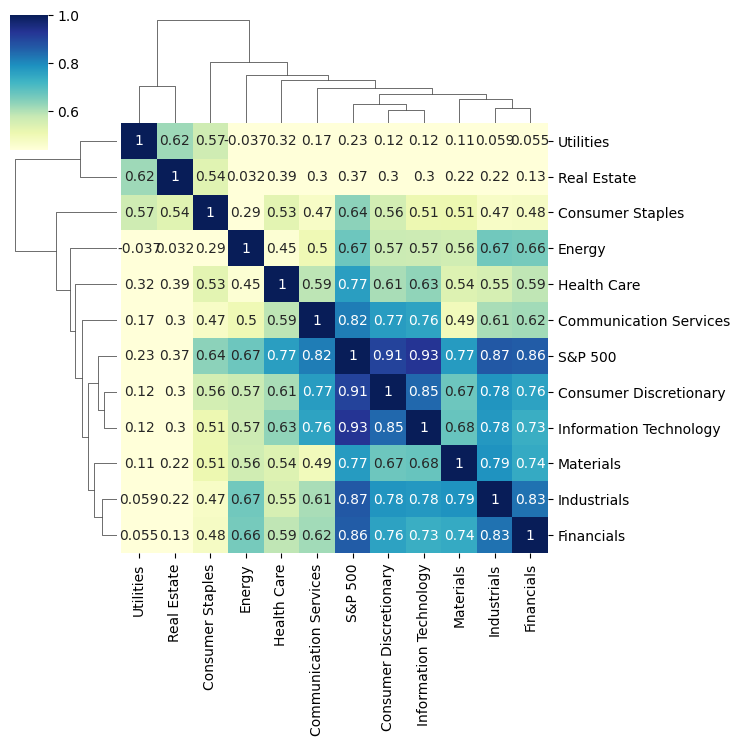

In [39]:
cluster_analysis(us_sectors_returns, None, '2020-01-29')

<a id="covid"></a>

## From the start of the COVID-19 pandemic to Start of the war in Ukraine

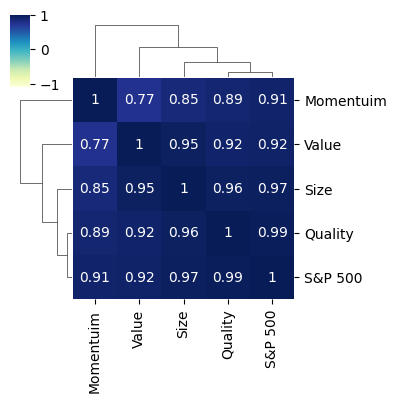

In [40]:
cluster_analysis(us_factors_returns, '2020-01-31', '2022-02-23')

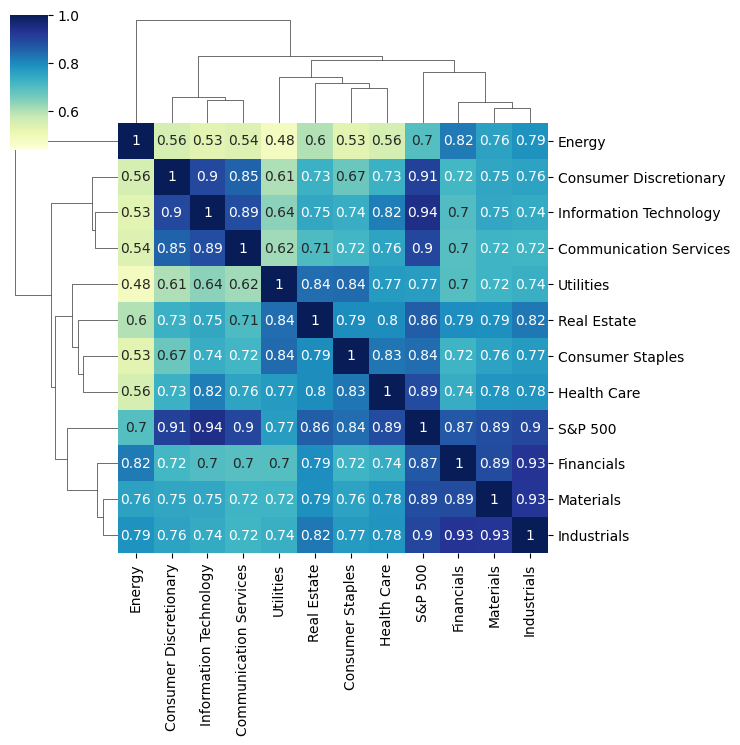

In [41]:
cluster_analysis(us_sectors_returns, '2020-01-31', '2022-02-23')

<a id="war"></a>

## From the start of the war in Ukraine to today

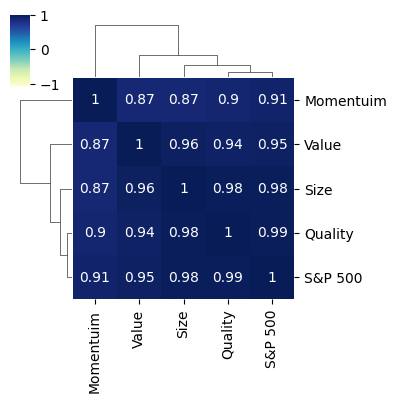

In [42]:
cluster_analysis(us_factors_returns, '2022-02-24', None)

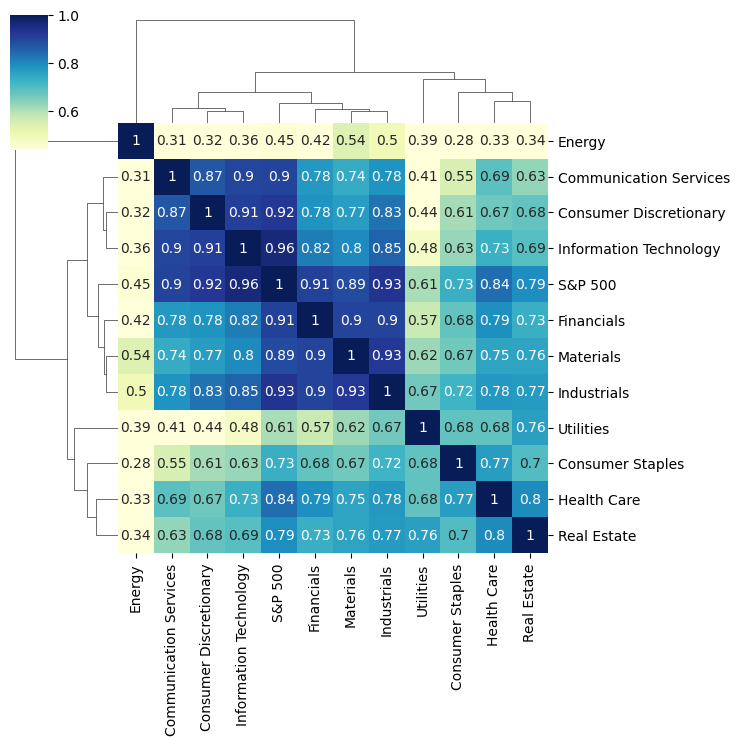

In [43]:
cluster_analysis(us_sectors_returns, '2022-02-24', None)